In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

file_path_mapping = {
    "CaliAdv": "Dataset\\traj-caliAdv.csv",
    "DisHolly": "Dataset\\traj-disHolly.csv",
    "Disland": "Dataset\\traj-disland.csv",
    "Edin": "Dataset\\traj-Edin.csv",
    "Epcot": "Dataset\\traj-epcot.csv",
    "Glas": "Dataset\\traj-Glas.csv",
    "MagicK": "Dataset\\traj-MagicK.csv",
    "Melb": "Dataset\\traj-Melb.csv",
    "Osak": "Dataset\\traj-Osak.csv",
    "Toro": "Dataset\\traj-Toro.csv"
}

def parse_data(pathname):
    trajectory_data = {}

    with open(pathname, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            traj_id = int(row['trajID'])
            poi_id = int(row['poiID'])
            
            if traj_id not in trajectory_data:
                trajectory_data[traj_id] = []
            
            trajectory_data[traj_id].append(poi_id)

    for traj_id, poi_ids in list(trajectory_data.items()):
        if len(poi_ids) < 3:
            del trajectory_data[traj_id]

    return trajectory_data

In [ ]:
trajectory_data = list(parse_data(file_path_mapping["CaliAdv"]).items())
paths = [data[1] for data in trajectory_data]
weightedG = nx.Graph()
for path in paths:
    for u, v in zip(path, path[1:]):
        if weightedG.has_edge(u, v):
            weightedG[u][v]['weight'] += 1
        else:
            weightedG.add_edge(u, v, weight=1)



C:\Users\shami\AppData\Local\Temp\ipykernel_9708\1657171859.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label="Edge Weight (log scale)")


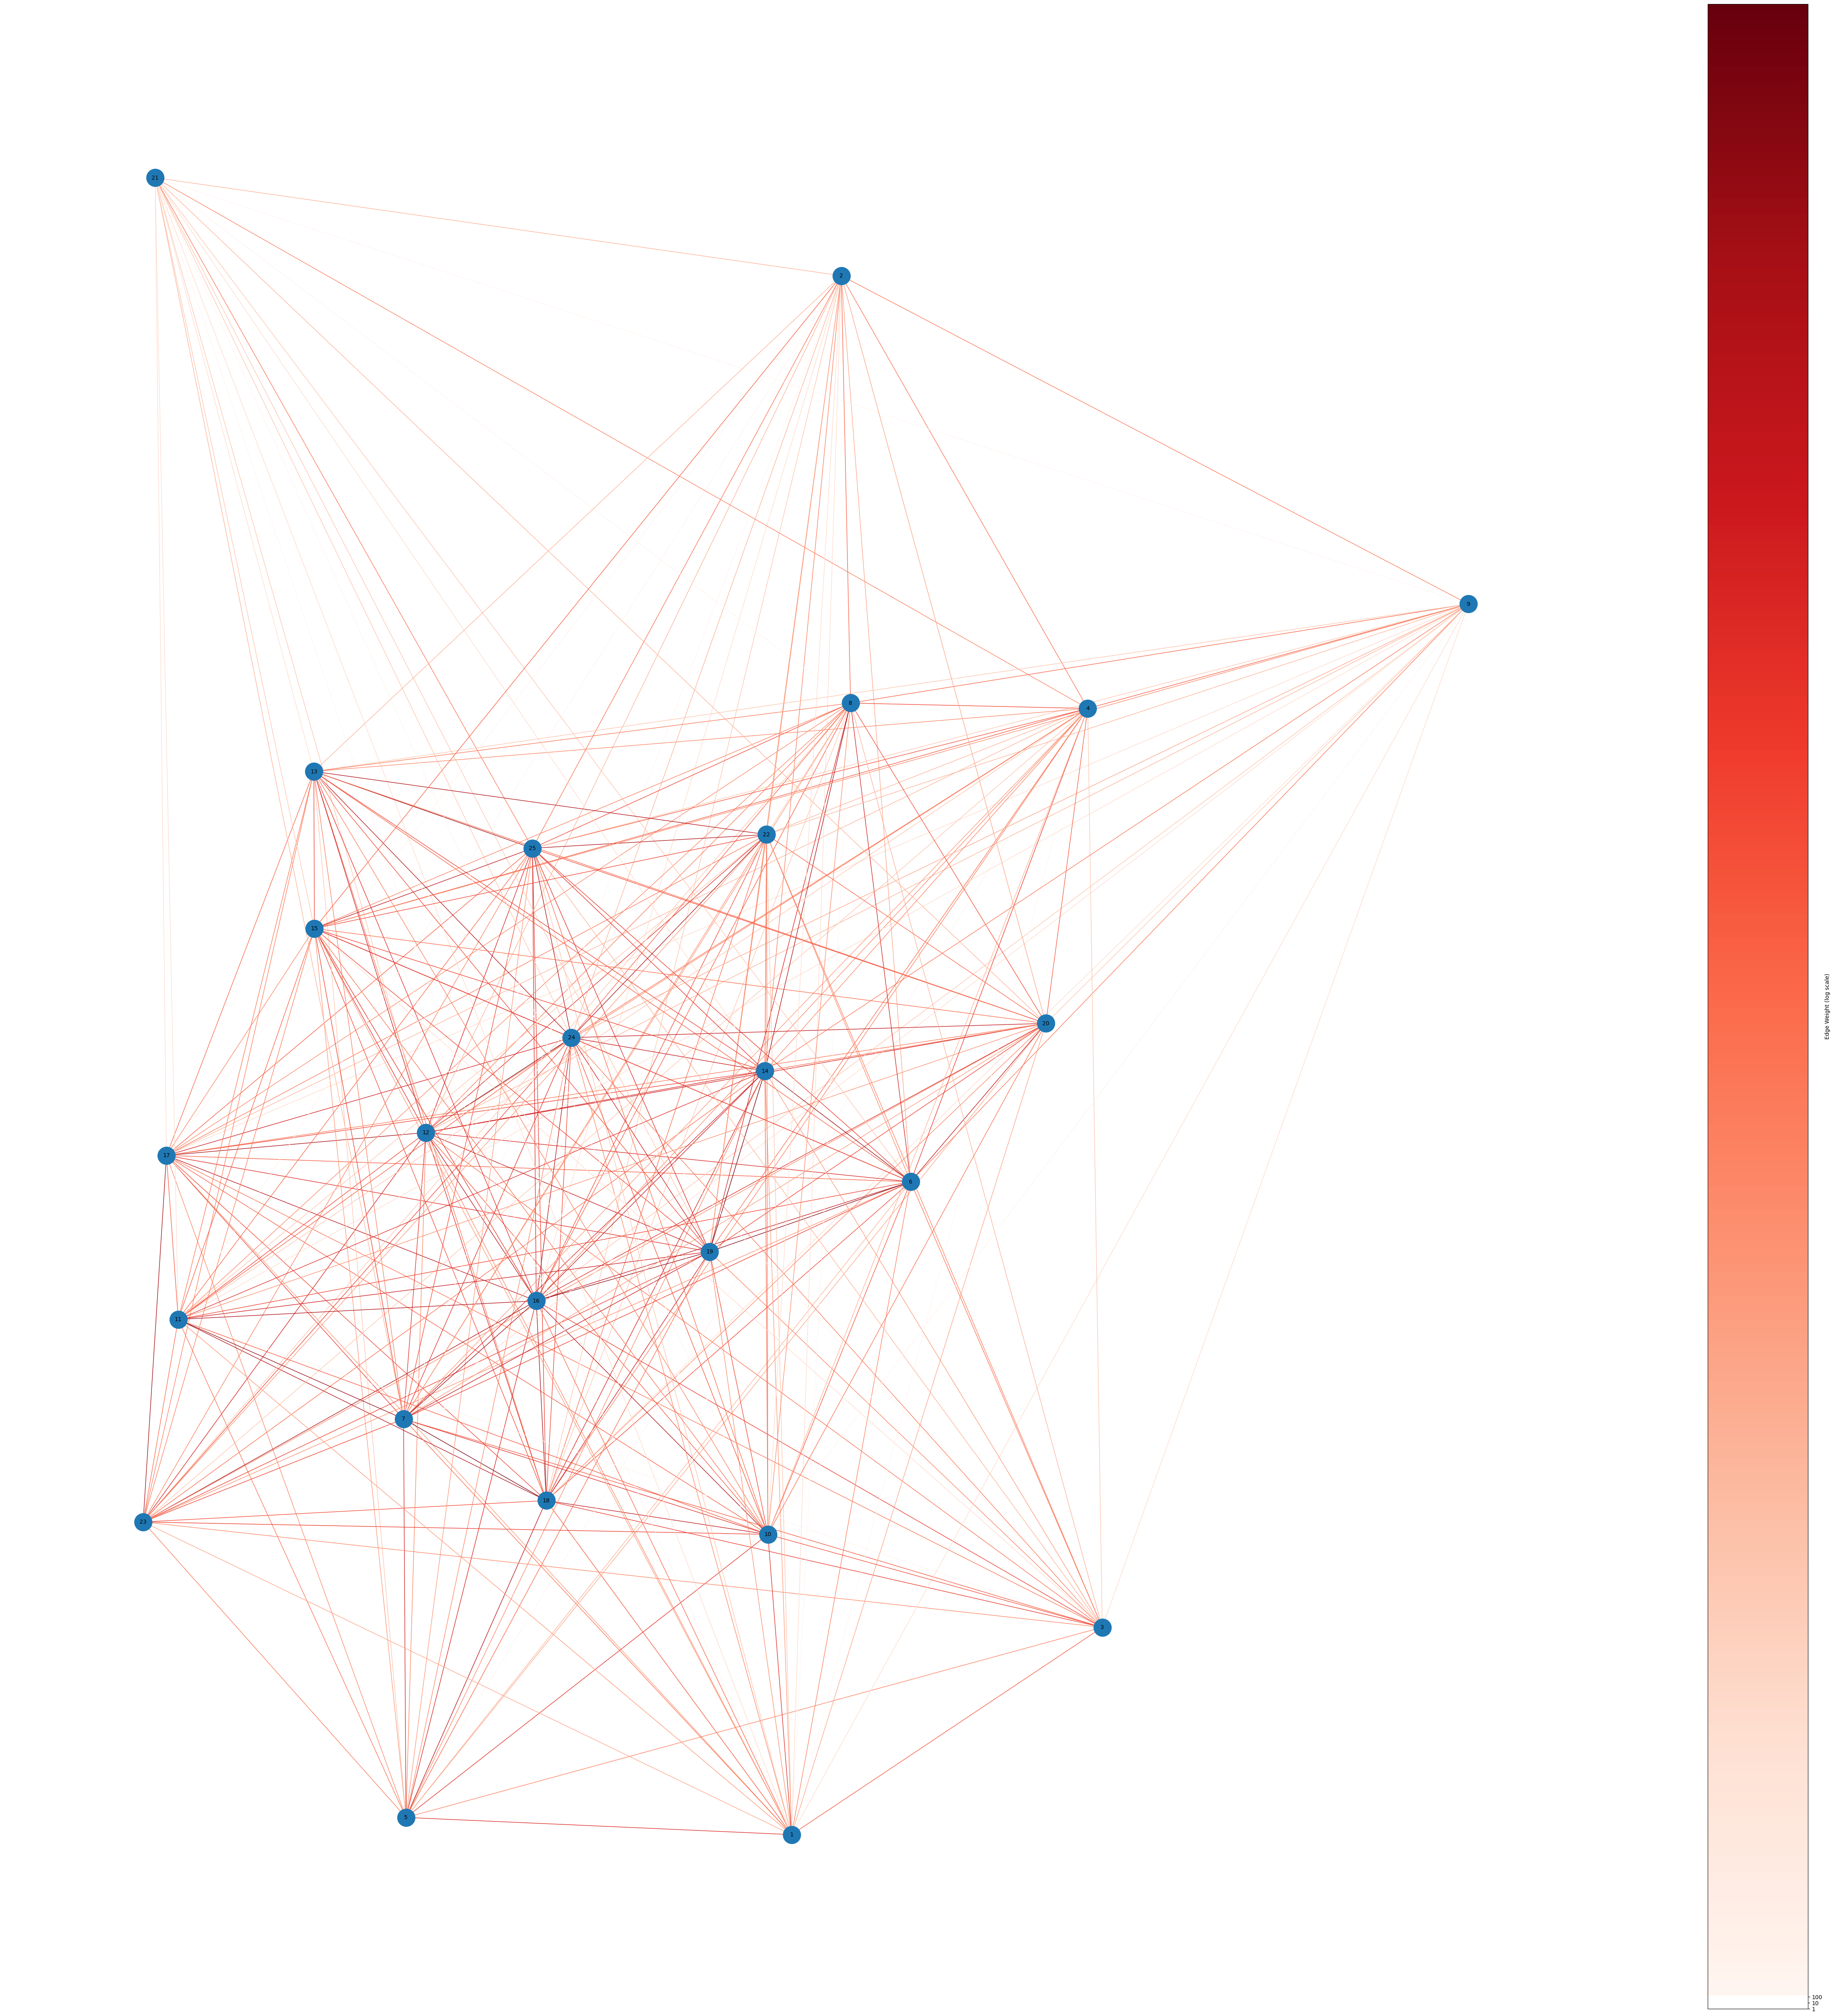

In [15]:
import numpy as np
from matplotlib.colors import LogNorm

# Create a color map based on edge weights (more blue for smaller values, more red for larger values)
edge_weights = [data['weight'] for _, _, data in weightedG.edges(data=True)]
# Choose a colormap (e.g., RdYlBu) and set a logarithmic scale for colors
cmap = plt.cm.Reds
log_norm = LogNorm(min(edge_weights), max(edge_weights))

# Create a list of colors based on the logarithmically normalized edge weights
edge_colors = [cmap(log_norm(weight)) for weight in edge_weights]

# Create a figure of size 50x50
plt.figure(figsize=(50, 50), facecolor='k', edgecolor='w') 

# Draw the graph with edge colors
pos = nx.spring_layout(weightedG)  # Adjust layout as needed
nx.draw(weightedG, pos, edge_color=edge_colors, with_labels=True, node_size=1000, font_size=10, font_color='black')

# Display the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label="Edge Weight (log scale)")
tick_vals = [10 ** i for i in range(int(np.log10(min(edge_weights))), int(np.log10(max(edge_weights))) + 1)]
cbar.set_ticks(log_norm(tick_vals))
cbar.set_ticklabels([f"{val:.0f}" for val in tick_vals])

# Display the graph
plt.show()